In [1]:
# Basic packages
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import math
import netCDF4 as nc

# DateTime packages
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates

# Stats packages
import scipy
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

# Logistical packages
import requests
from importlib import reload
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText

# function with `while` loop 
This function converts decimal numbers to binary numbers.

The below table gives values that you can use to check the function. Values can be verified [here](https://www.rapidtables.com/convert/number/decimal-to-binary.html?x=365).

| Decimal      | Binary     |
| :---        |          ---: |
| 6      | 110   |
| 72   | 1001000      |
| 365   | 101101101     |

In [2]:
def to_binary(num):
    a = 0
    b = 1
    while num > 0:
        rem = num%2
        a += rem * b
        b = b*10
        num = num//2 
    return a

print(to_binary(6))
print(to_binary(72))
print(to_binary(365))

110
1001000
101101101


# function with `for` loop and `if` statements

In [3]:
def remove_outliers_cooks(X, Y):
    
    """
    This function calculates Cook's distance for both X and Y.
    Where Cook's distance is 3x the mean Cook's distance, the outlier is removed.
    
    Returns x and y arrays with outliers removed.
    """
    
    import numpy as np
    import statsmodels.api as sm
    
    # If X and Y are different length, print a warning and return.
    if not len(X) == len(Y):
        print('X and Y are not the same length.')
        return
    
    # Lazy way of checking if the inputs are numpy arrays
    # If not numpy arrays, make them numpy arrays
    if type(X) != type(np.arange(10)):
        x = X.to_numpy()
    else:
        x = X
    if type(Y) != type(np.arange(10)):
        y = Y.to_numpy()
    else: 
        y = Y
    
    # Cook's distance as a function of x variable
    x2 = sm.add_constant(x)
    model = sm.OLS(y, x2).fit()
    influence = model.get_influence()
    inf_sum = influence.summary_frame()
    # The outlier will be defined by 3 times the mean Cook's distance
    lim = 3 * inf_sum['cooks_d'].mean()
    outliers_x = []
    
    # Cook's distance as a function of y variable
    y2 = sm.add_constant(y)
    m = sm.OLS(x, y2).fit() 
    np.set_printoptions(suppress=True)
    influence2 = m.get_influence()
    inf_sum_ = influence2.summary_frame()
    # The outlier will be defined by 3 times the mean Cook's distance
    lim2 = 3 * inf_sum_['cooks_d'].mean()
    
    # inf_sum and inf_sum_ should be the same length
    # loop through both inf_sum and inf_sum_ by index
    # if, at that index, cook's distance is above the threshold
    # make note of that index
    for i in inf_sum_.index:
        if inf_sum['cooks_d'].iloc[i] > lim:
            outliers_x.append(i)
        if inf_sum_['cooks_d'].iloc[i] > lim2:
            outliers_x.append(i)
    # Noted outlier indices dropeed
    x = np.delete(x, outliers_x)
    y = np.delete(y, outliers_x)
    x = x.squeeze()
    y = y.squeeze()
    
    return x,y

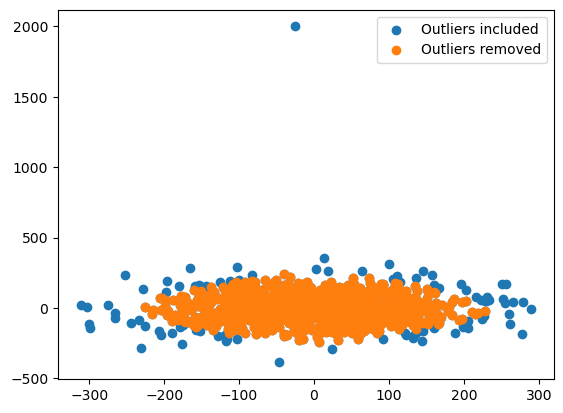

In [4]:
# Create 2 numpy arrays of random number normally distributed
A = np.random.randn(1000) * 100
B = np.random.randn(1000) * 100
# To guarantee at least one outlier
# Randomly assign one element of B to be too big
B[np.random.randint(1000)] = 2000

fig, ax = plt.subplots()
[a,b] = remove_outliers_cooks(A,B)
ax.scatter(A,B, label = 'Outliers included')
ax.scatter(a,b, label = 'Outliers removed')
ax.legend()